<a href="https://colab.research.google.com/github/Chetupatil24/pubg/blob/main/game_winpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Game** **AI** - **Winner** **Predication**

## GameWinnerPred:-Game Al-Winner Prediction

This is PUBG game Data Set. The data contains a large number of anonymized game stats for a single player with all match types. The target is to create a ML model which predicts players' finishing placement on there final stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#loading data

data=pd.read_csv('/content/gdrive/MyDrive/pubg.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

**Domain** **Analysis**
* **DBNOs** – Number of enemy players knocked.
* **assists** – Number of enemy players this player damaged that were killed by teammates.
* **boosts** – Number of boost items used.
* **damageDealt** – Total damage dealt. Note: Self inflicted damage is subtracted.
* **headshotKills** – Number of enemy players killed with headshots.
* **heals** – Number of healing items used.
* **Id** – Player’s Id
* **killPlace** – Ranking in match of number of enemy players killed.
* **killPoints** – Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* **killStreaks** – Max number of enemy players killed in a short amount of time.
* **kills** – Number of enemy players killed.
* **longestKill** – Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* **matchDuration** – Duration of match in seconds.
* **matchId** – ID to identify match. There are no matches that are in both the training and testing set.
* **matchType** – String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* **rankPoints** – Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* **revives** – Number of times this player revived teammates.
* **rideDistance** – Total distance traveled in vehicles measured in meters.
* **roadKills** – Number of kills while in a vehicle.
* **swimDistance** – Total distance traveled by swimming measured in meters.
* **teamKills** – Number of times this player killed a teammate.
* **vehicleDestroys** – Number of vehicles destroyed.
* **walkDistance** – Total distance traveled on foot measured in meters.
* weaponsAcquired – Number of weapons picked up.
* **winPoints** – Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* **groupId** – ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* **numGroups** – Number of groups we have data for in the match.
* **maxPlace** – Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* **winPlacePerc** – The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

I hope you got a brief about what the game is about and the dataset as well.

In [ ]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
data.shape

(4446966, 29)

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
data.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [ ]:
data.sample(10) # print random six row from the dataset

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3833174,8af304673d1bd1,b0974feb1ebeeb,200a31a901521f,0,3,693.60,4,1,5,4,...,2,0.0,0,6.292,0,0,3469.00,5,0,0.9259
1487702,a49e5f24f0e7d0,7d5b7cc2e9b2eb,ce88f9c8c35bdf,0,0,98.28,0,0,4,73,...,0,0.0,0,0.000,0,0,144.40,3,0,0.2234
410857,783b740abe999e,0d05809359877b,b9411957bb3e38,0,0,75.00,1,0,0,56,...,0,0.0,0,0.000,0,0,709.30,3,0,0.4773
1042056,6a4801d928b14e,aaa576fd3be488,0dfd05856551e7,0,1,263.40,1,1,4,35,...,1,2019.0,0,0.000,0,0,2146.00,6,0,0.5000
1224639,69fa0a13ad5798,69a297b9b82d70,ea01d7450df806,0,0,100.00,1,0,0,82,...,0,0.0,0,0.000,0,0,29.35,2,0,0.1200
2123138,afcbc220d0b636,81d67b05114f55,99aa3d742800a3,0,0,60.63,0,0,0,65,...,1,0.0,0,0.000,0,0,481.00,4,0,0.3077
2597781,df7742628059dd,31ac3c360ad89a,46c372b206c7f0,0,2,91.13,0,0,4,68,...,0,0.0,0,0.000,0,0,181.80,2,1544,0.3516
3045268,9042cbd87c6678,ce9441422c720e,1e9628eff5cffe,0,0,148.60,0,0,0,42,...,0,0.0,0,0.000,0,0,93.00,1,1510,0.2604
3396967,c21491b9300425,05186c2c35f5cd,f46155dd1c134d,0,0,93.53,0,0,0,80,...,0,0.0,0,0.000,0,0,252.40,1,1458,0.2759
2884116,7a85986d59a649,9cdbea52046ed5,1682b491c625a0,0,1,269.00,0,1,3,5,...,0,5297.0,0,0.000,0,0,3446.00,4,1541,0.9889


**Exploratroy** **data** **analysis** (EDA)

In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


## **univariate** **analusis**

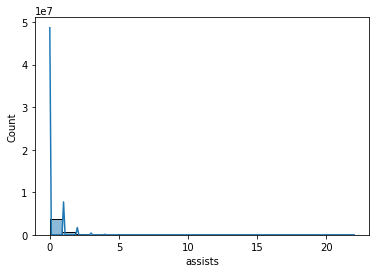

In [ ]:
sns.histplot(x=data.assists,kde=True)
plt.show()

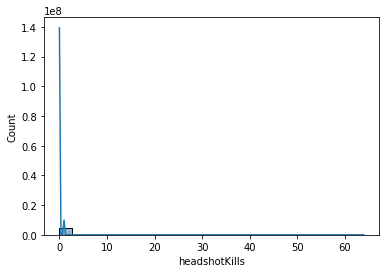

In [ ]:
sns.histplot(x=data.headshotKills,kde=True)
plt.show()

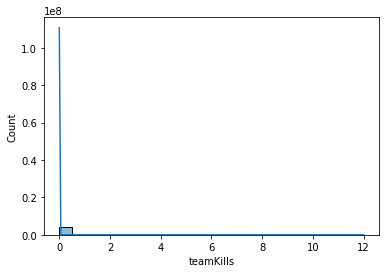

In [ ]:
sns.histplot(x=data.teamKills,kde=True)
plt.show()

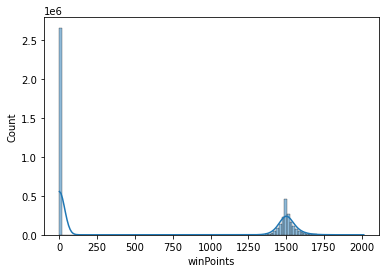

In [ ]:
sns.histplot(x=data.winPoints,kde=True)
plt.show()

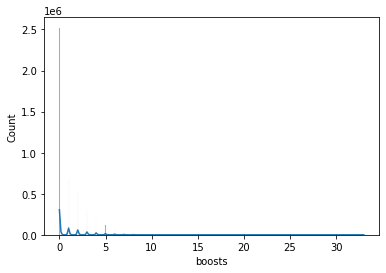

In [ ]:
sns.histplot(x=data.boosts,kde=True)
plt.show()

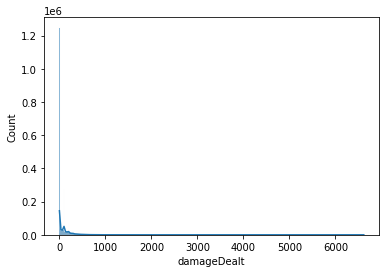

In [ ]:
sns.histplot(x=data.damageDealt,kde=True)
plt.show()

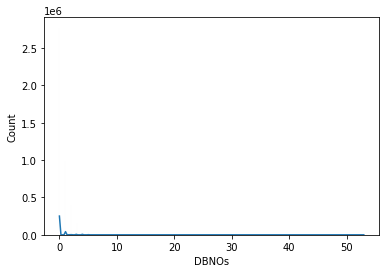

In [ ]:
sns.histplot(x=data.DBNOs,kde=True)
plt.show()

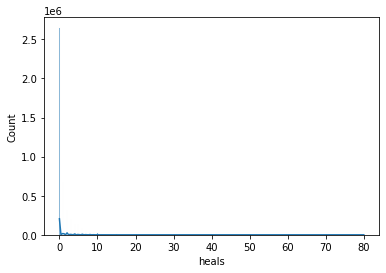

In [ ]:
sns.histplot(x=data.heals,kde=True)
plt.show()

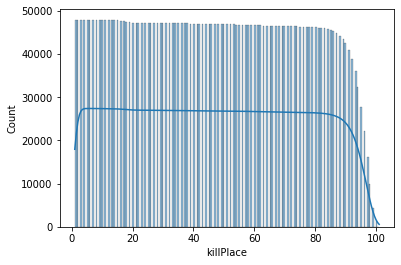

In [ ]:
sns.histplot(x=data.killPlace,kde=True)
plt.show()

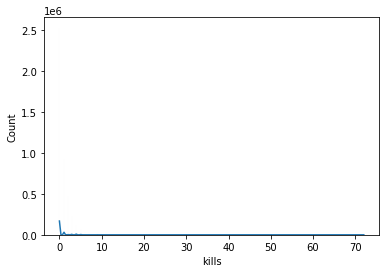

In [ ]:
sns.histplot(x=data.kills,kde=True)
plt.show()

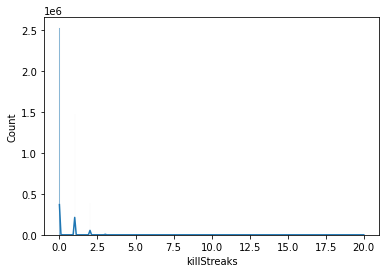

In [ ]:
sns.histplot(x=data.killStreaks,kde=True)
plt.show()

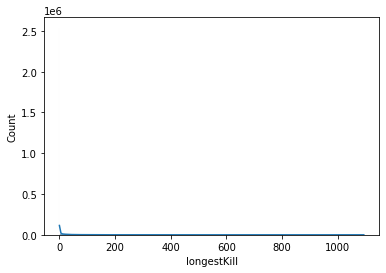

In [ ]:
sns.histplot(x=data.longestKill,kde=True)
plt.show()

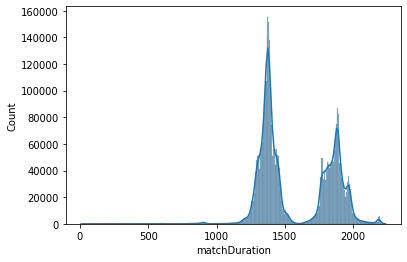

In [ ]:
sns.histplot(x=data.matchDuration,kde=True)
plt.show()

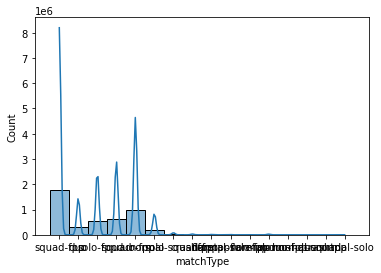

In [ ]:
sns.histplot(x=data.matchType,kde=True)
plt.show()

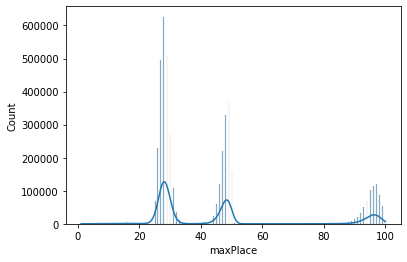

In [ ]:
sns.histplot(x=data.maxPlace,kde=True)
plt.show()

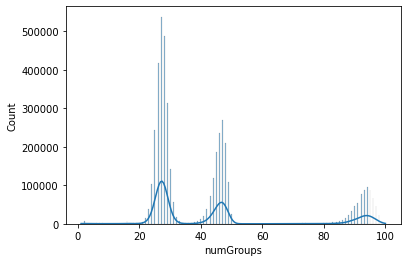

In [ ]:
sns.histplot(x=data.numGroups,kde=True)
plt.show()

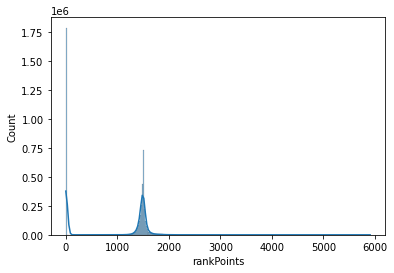

In [ ]:
sns.histplot(x=data.rankPoints,kde=True)
plt.show()

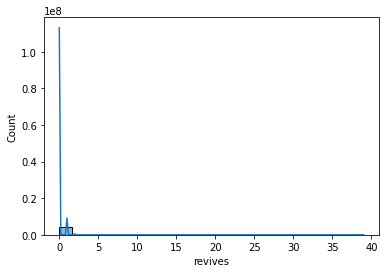

In [ ]:

sns.histplot(x=data.revives,kde=True)
plt.show()

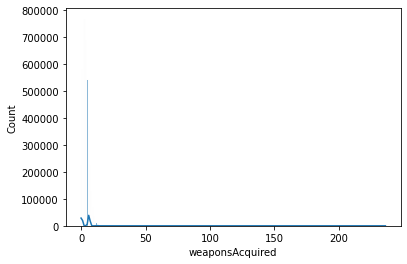

In [ ]:
sns.histplot(x=data.weaponsAcquired,kde=True)
plt.show()

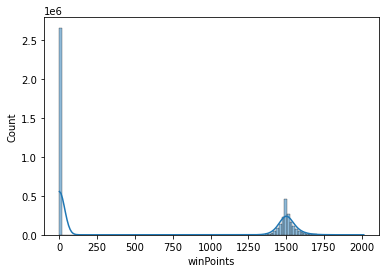

In [ ]:
sns.histplot(x=data.winPoints,kde=True)
plt.show()

## BIVARIATE ANALYSIS

# It refers to plots between input variables and target variable.

In [ ]:
data.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007644,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555289,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.023277,-0.730498,-0.810516,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490143,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023277,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730498,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810516,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


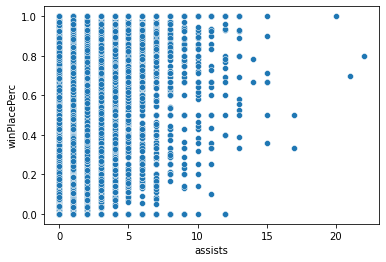

In [ ]:
sns.scatterplot(x=data.assists,y=data.winPlacePerc,data=data)
plt.show()

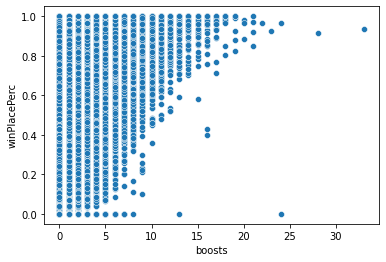

In [ ]:
sns.scatterplot(x=data.boosts,y=data.winPlacePerc,data=data)
plt.show()

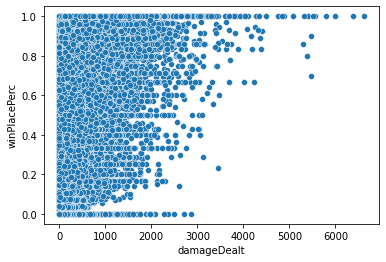

In [ ]:
sns.scatterplot(x=data.damageDealt,y=data.winPlacePerc,data=data)
plt.show()

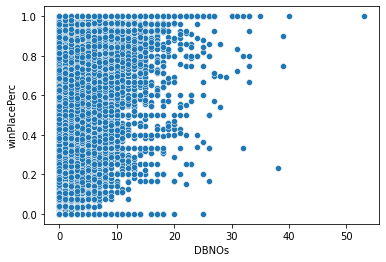

In [ ]:
sns.scatterplot(x=data.DBNOs,y=data.winPlacePerc,data=data)
plt.show()

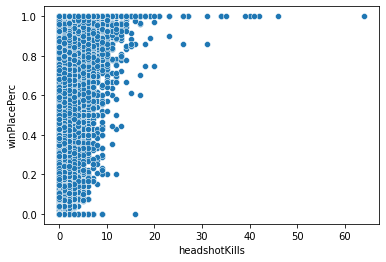

In [ ]:
sns.scatterplot(x=data.headshotKills,y=data.winPlacePerc,data=data)
plt.show()

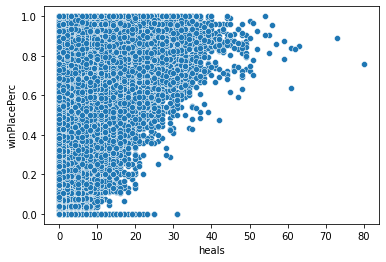

In [ ]:
sns.scatterplot(x=data.heals,y=data.winPlacePerc,data=data)
plt.show()

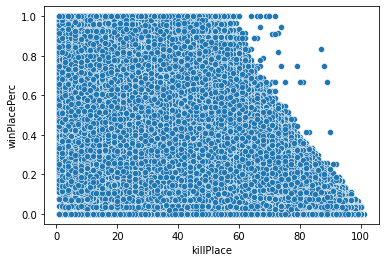

In [ ]:
sns.scatterplot(x=data.killPlace,y=data.winPlacePerc,data=data)
plt.show()

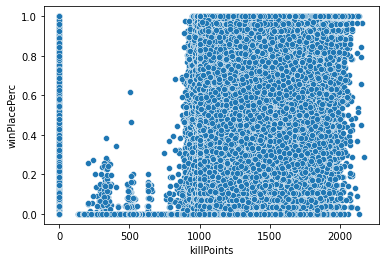

In [ ]:
sns.scatterplot(x=data.killPoints,y=data.winPlacePerc,data=data)
plt.show()

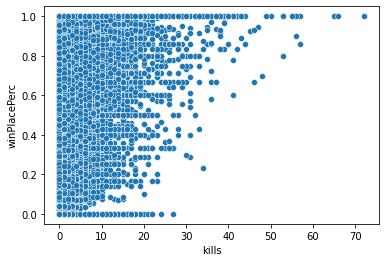

In [ ]:
sns.scatterplot(x=data.kills,y=data.winPlacePerc,data=data)
plt.show()

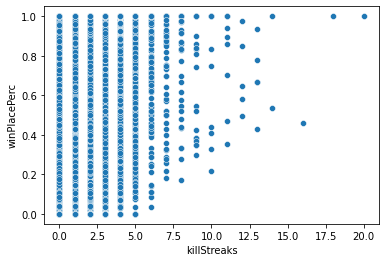

In [ ]:
sns.scatterplot(x=data.killStreaks,y=data.winPlacePerc,data=data)
plt.show()

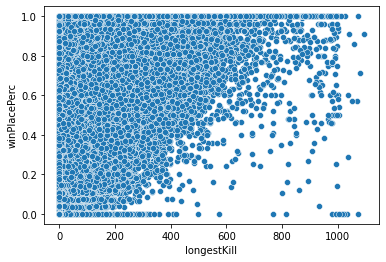

In [ ]:
sns.scatterplot(x=data.longestKill,y=data.winPlacePerc,data=data)
plt.show()

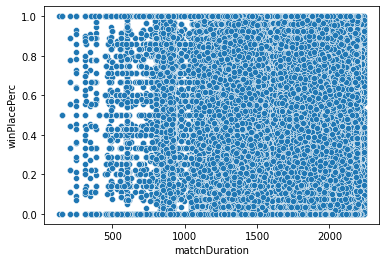

In [ ]:
sns.scatterplot(x=data.matchDuration,y=data.winPlacePerc,data=data)
plt.show()

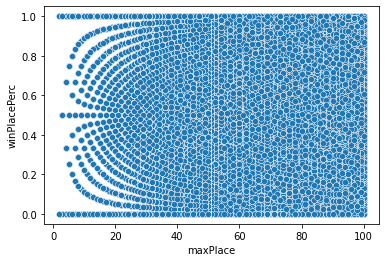

In [ ]:
sns.scatterplot(x=data.maxPlace,y=data.winPlacePerc,data=data)
plt.show()

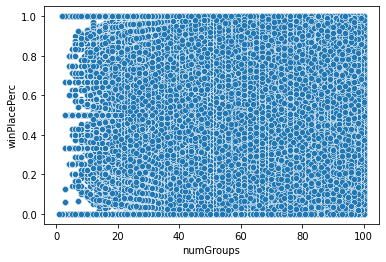

In [ ]:
sns.scatterplot(x=data.numGroups,y=data.winPlacePerc,data=data)
plt.show()

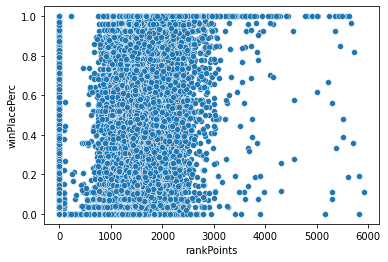

In [ ]:
sns.scatterplot(x=data.rankPoints,y=data.winPlacePerc,data=data)
plt.show()

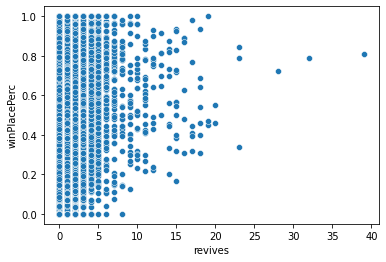

In [ ]:
sns.scatterplot(x=data.revives,y=data.winPlacePerc,data=data)
plt.show()

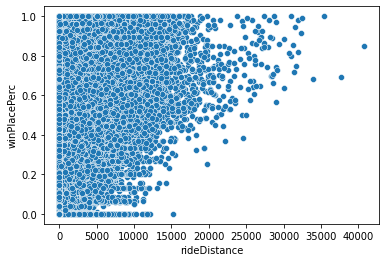

In [ ]:
sns.scatterplot(x=data.rideDistance,y=data.winPlacePerc,data=data)
plt.show()

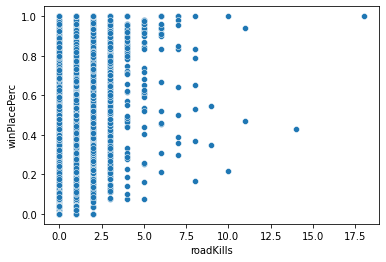

In [ ]:
sns.scatterplot(x=data.roadKills,y=data.winPlacePerc,data=data)
plt.show()

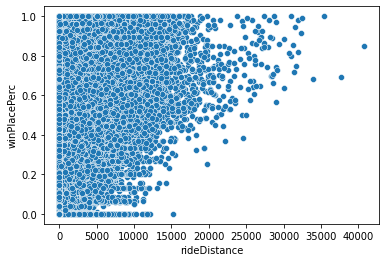

In [ ]:
sns.scatterplot(x=data.rideDistance,y=data.winPlacePerc,data=data)
plt.show()

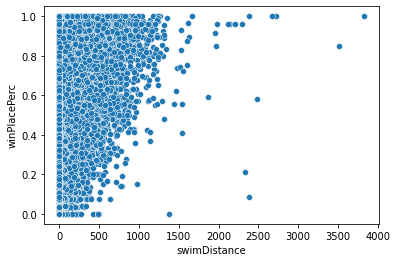

In [ ]:
sns.scatterplot(x=data.swimDistance,y=data.winPlacePerc,data=data)
plt.show()

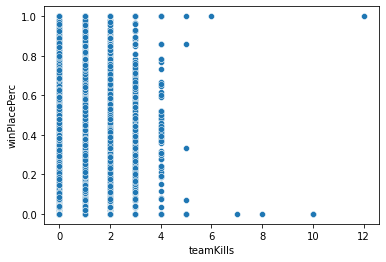

In [ ]:
sns.scatterplot(x=data.teamKills,y=data.winPlacePerc,data=data)
plt.show()

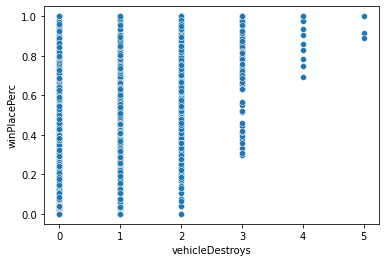

In [ ]:
sns.scatterplot(x=data.vehicleDestroys,y=data.winPlacePerc,data=data)
plt.show()

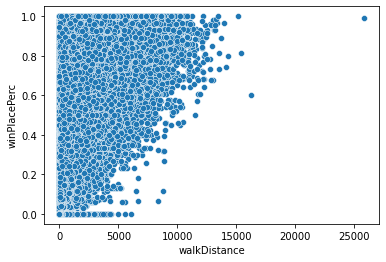

In [ ]:
sns.scatterplot(x=data.walkDistance,y=data.winPlacePerc,data=data)
plt.show()

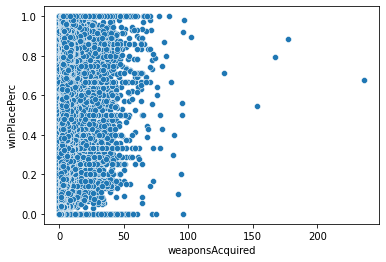

In [ ]:
sns.scatterplot(x=data.weaponsAcquired,y=data.winPlacePerc,data=data)
plt.show()

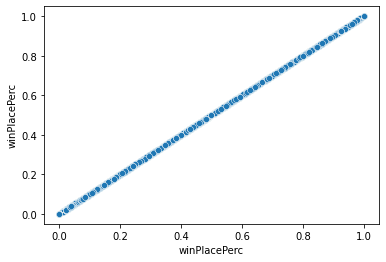

In [ ]:
sns.scatterplot(x=data.winPlacePerc,y=data.winPlacePerc,data=data)
plt.show()

# MULTIVARIATE ANALYSIS

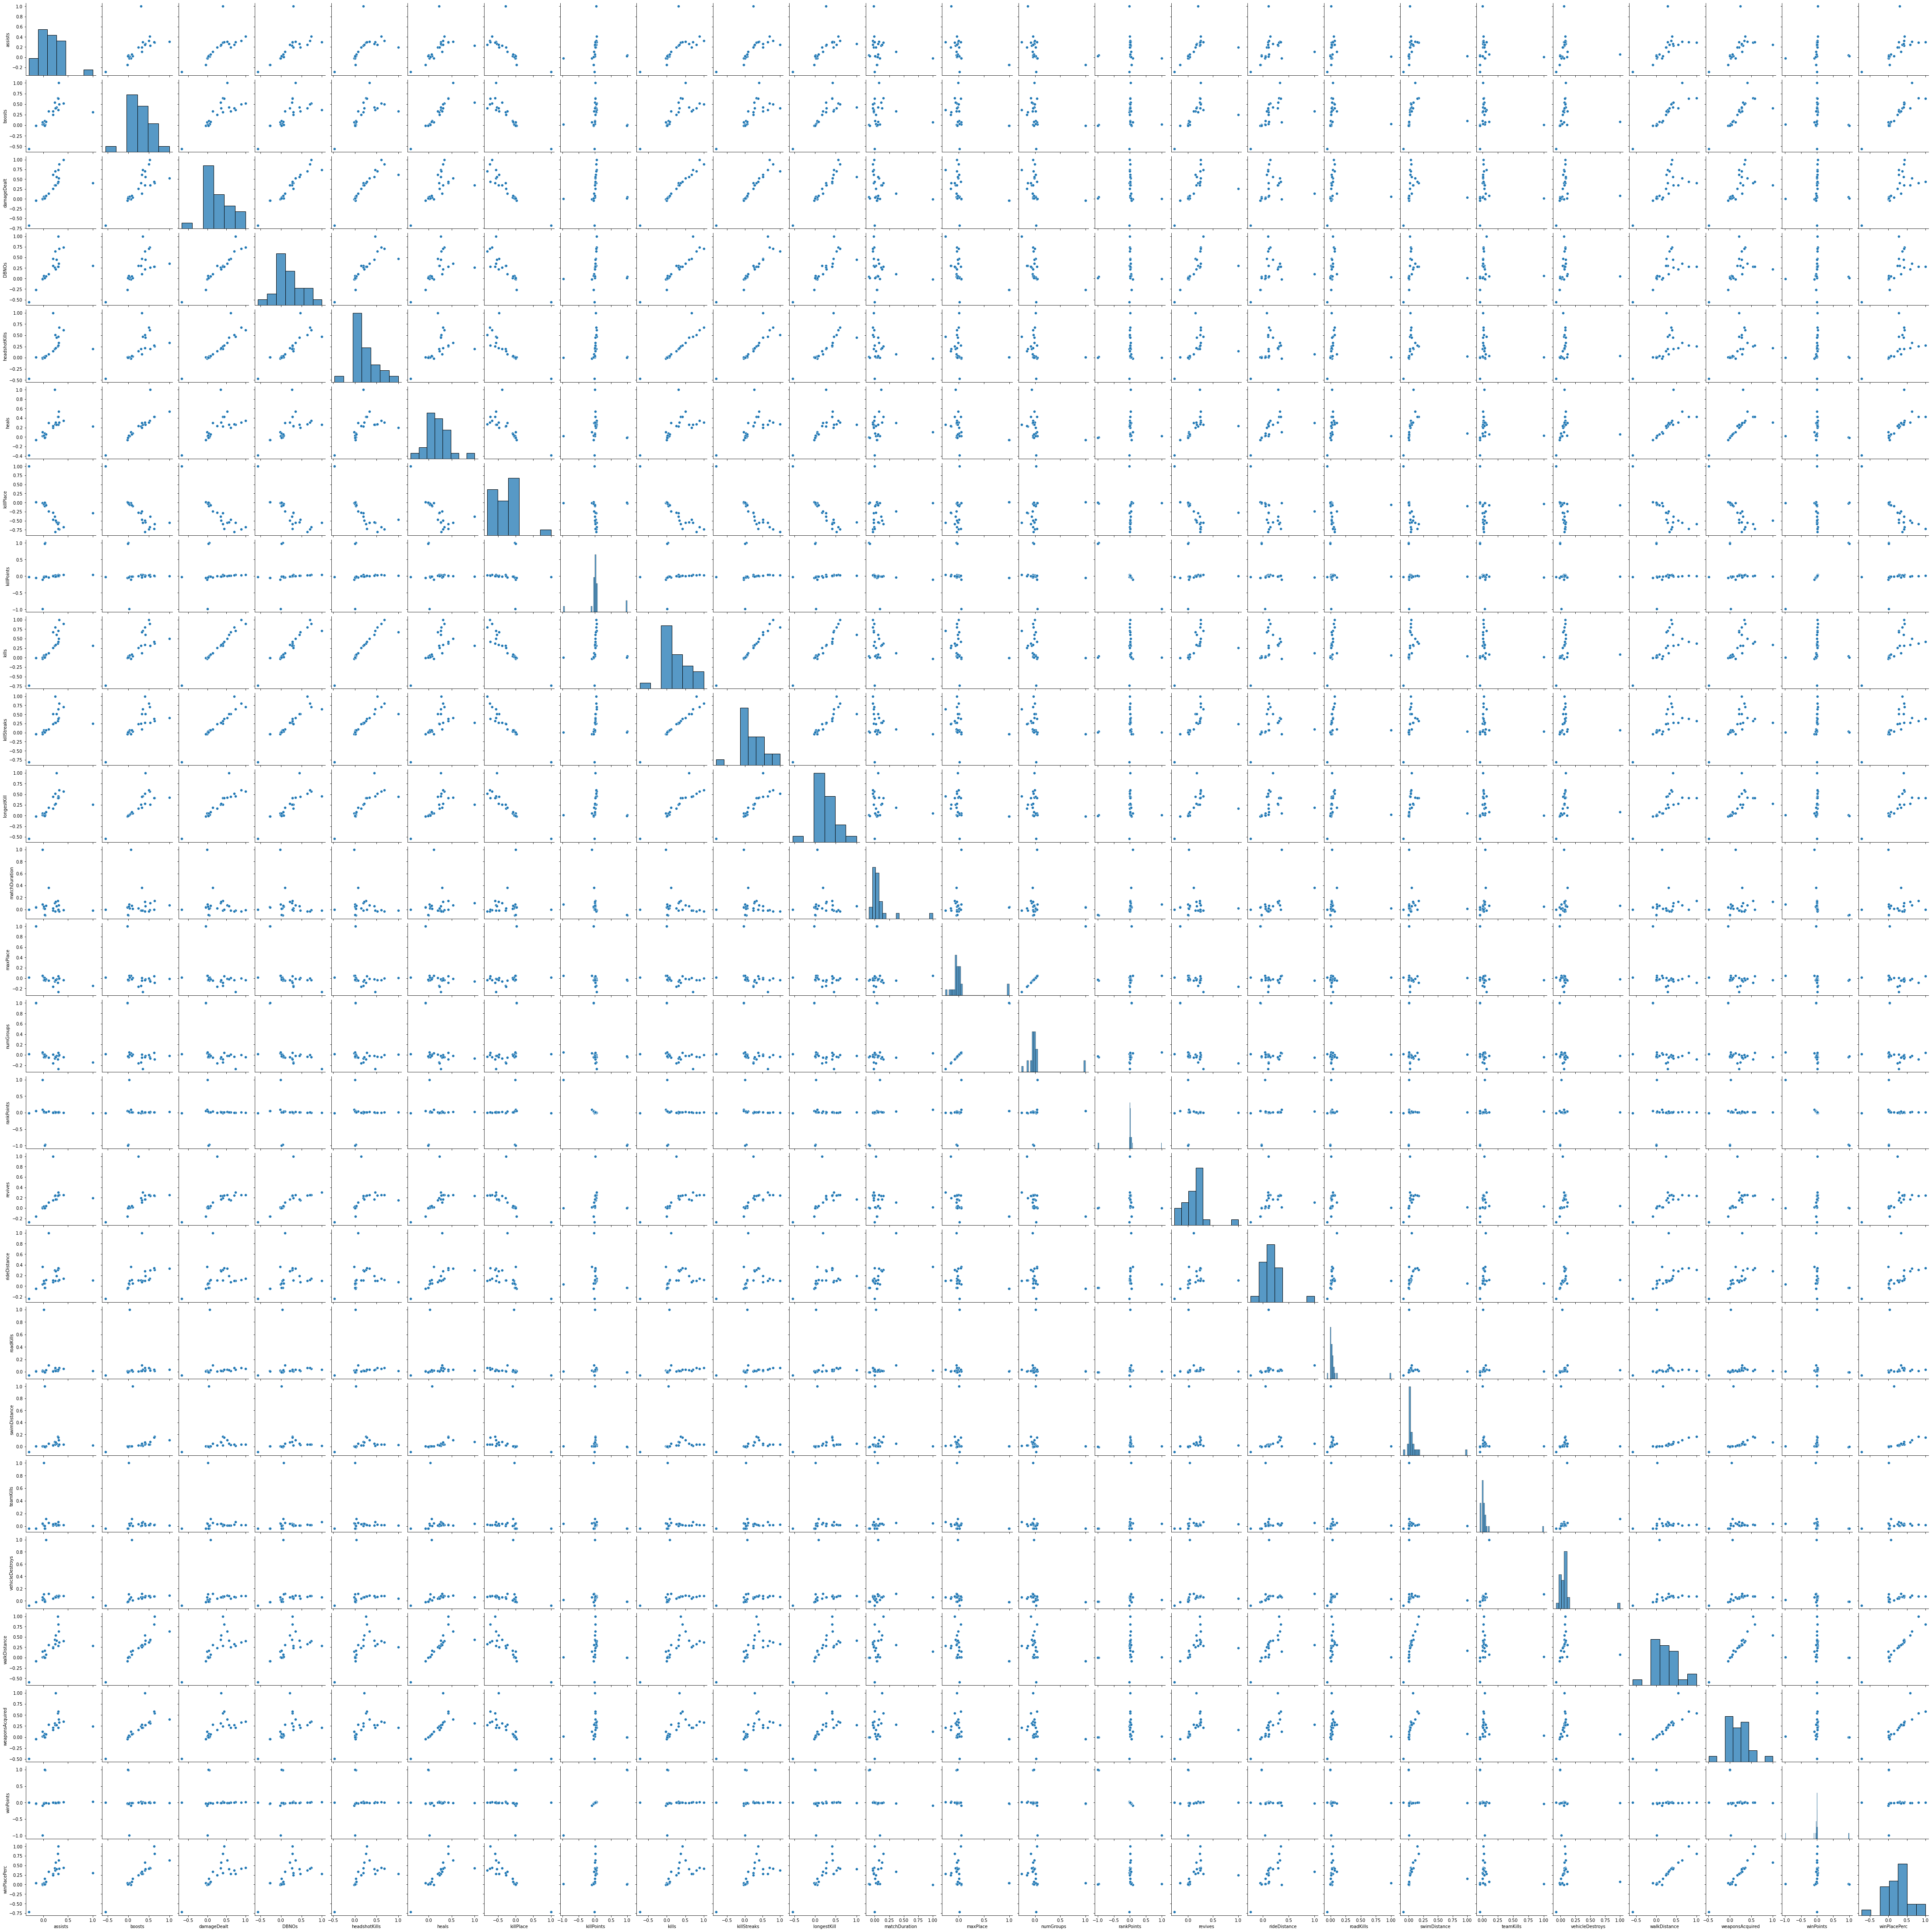

In [ ]:
sns.pairplot(data=data.corr())
plt.show()

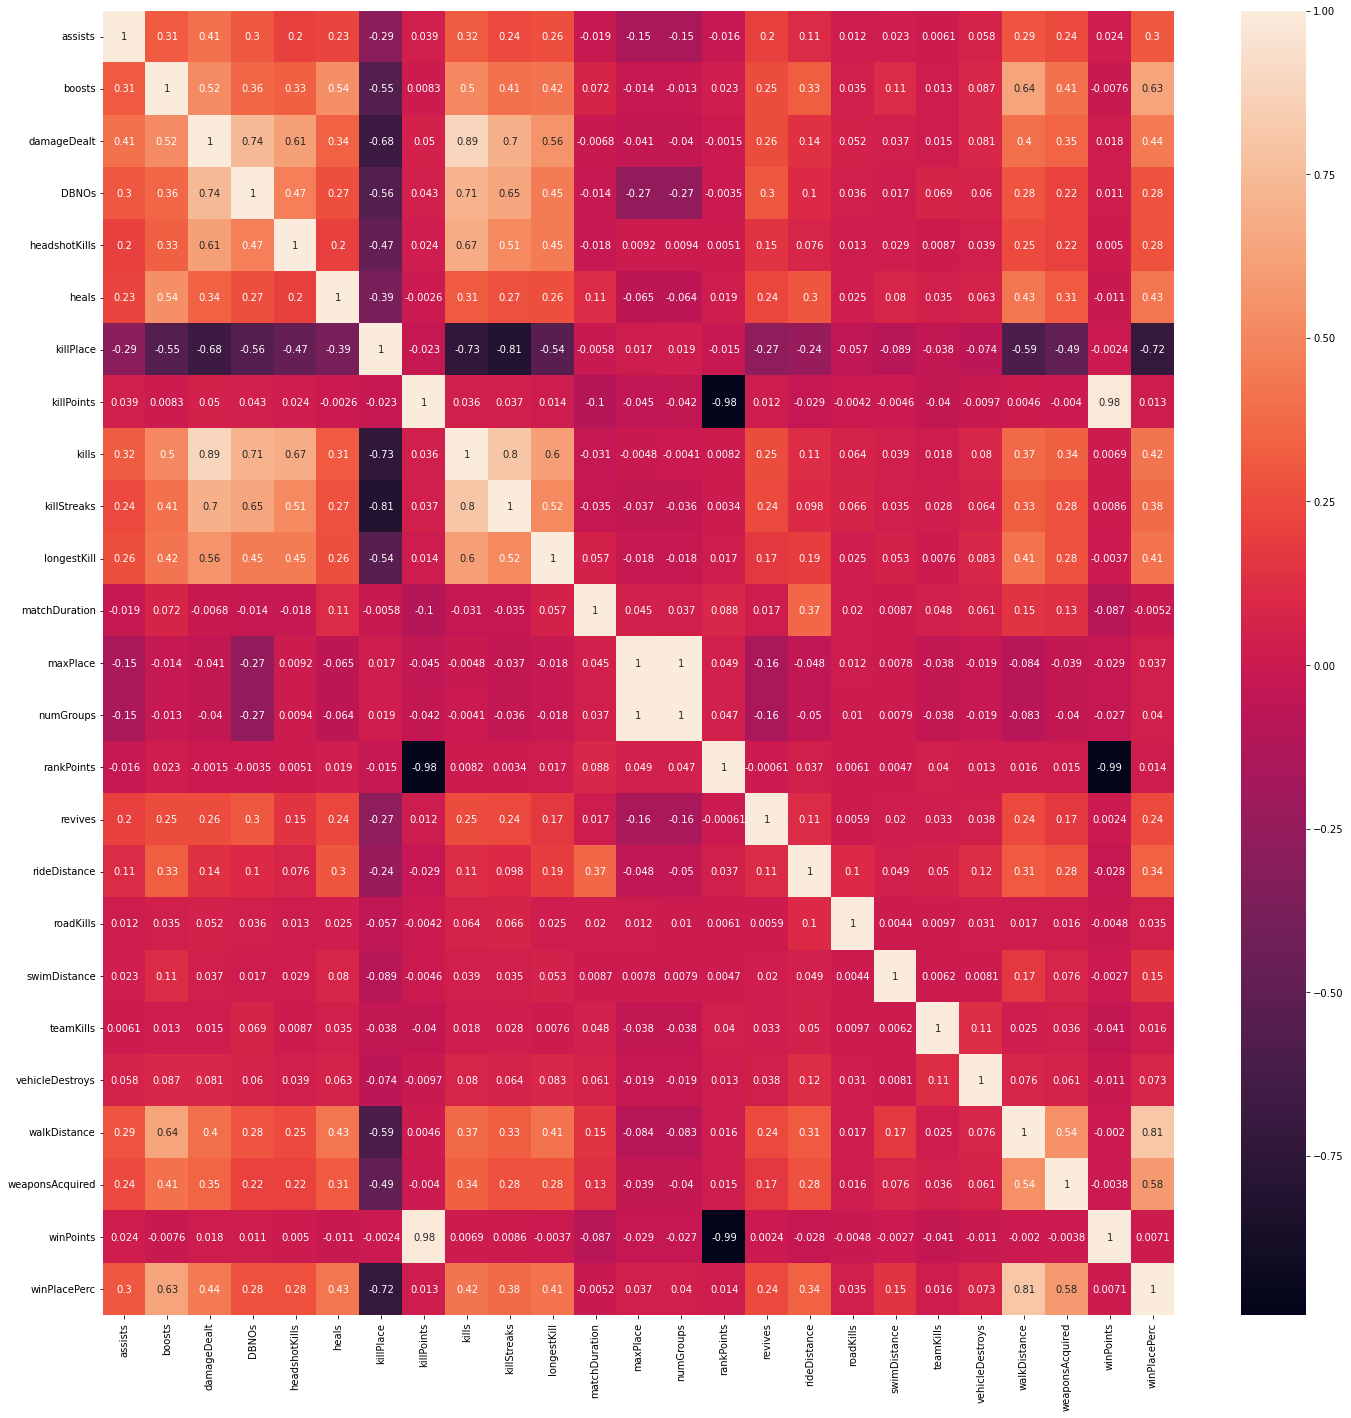

In [ ]:
plt.figure(figsize=(24,24),facecolor='white')
sns.heatmap(data=data.corr(),annot=True)
plt.show()

# **Data Preprocessing and Feature EngineerinDatag**

Handling missing values

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

## Before we apply feature engineering, let’s see what it is.

### A feature engineering process is used to create a new feature from the existing data that helps us understand the data more deeply.

In [ ]:
#  headshot_rate feature
data['headshot_rate'] = data['headshotKills'] / data['kills']
data['headshot_rate']

0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
4446961    NaN
4446962    NaN
4446963    NaN
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4446966, dtype: float64

In [ ]:
data['headshot_rate'].fillna(value=0,inplace=True)

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
headshot_rate      0
dtype: int64

In [ ]:
data["health refill"]=data["boosts"]+data["heals"]
data["travel"]=data["walkDistance"]+data["swimDistance"]+data['rideDistance']
data["killss"]=data['headshotKills']+data['longestKill']

In [ ]:
new_data=data[['Id','groupId','matchId','assists','boosts','damageDealt','DBNOs','matchType','heals','killPlace','killPoints','kills','killStreaks','matchDuration','maxPlace','numGroups','rankPoints','revives','travel','teamKills','weaponsAcquired','winPoints','roadKills','winPlacePerc']]

In [ ]:
new_data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,matchType,heals,killPlace,...,maxPlace,numGroups,rankPoints,revives,travel,teamKills,weaponsAcquired,winPoints,roadKills,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,squad-fpp,0,60,...,28,26,-1,0,244.8000,0,1,1466,0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,squad-fpp,0,57,...,26,25,1484,0,1445.0445,0,5,0,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,duo,0,47,...,50,47,1491,0,161.8000,0,2,0,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,squad-fpp,0,75,...,31,30,1408,0,202.7000,0,3,0,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,solo-fpp,0,45,...,97,95,1560,0,49.7500,0,2,0,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,squad-fpp,0,74,...,29,28,-1,0,2311.0000,0,3,1507,0,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,solo,0,69,...,93,93,1501,0,81.7000,0,6,0,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,squad-fpp,0,66,...,28,28,1500,0,790.8840,0,4,0,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,squad-fpp,2,11,...,26,25,1418,2,2748.0000,0,8,0,0,0.8000


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   matchType        object 
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  matchDuration    int64  
 14  maxPlace         int64  
 15  numGroups        int64  
 16  rankPoints       int64  
 17  revives          int64  
 18  travel           float64
 19  teamKills        int64  
 20  weaponsAcquired  int64  
 21  winPoints        int64  
 22  roadKills        int64  
 23  winPlacePerc     float64
dtypes: float64(3), int64(17), object(4)
memory usage: 814.3+ MB


In [ ]:
new_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'matchType', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'travel', 'teamKills', 'weaponsAcquired', 'winPoints', 'roadKills',
       'winPlacePerc'],
      dtype='object')

In [ ]:
unique_sum=data['matchType'].nunique()
print("Number of unique values fount in Match Type is -",unique_sum)
data['matchType'].value_counts()

Number of unique values fount in Match Type is - 16


squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

##As we can see in the above we have a totat 16 match type
so we can combine the 16 match types to 5  (squad,duo,solo,crash,flare)
Squad(normal-squad-fpp,squad,squad-fpp)=2
duo(duo-fpp,duo,normal-duo-fpp,normal)=1
solo(solo-fpp,solo)=0
flare(flaretpp)=3
crash(crashfpp)=4

In [ ]:
data['matchType'].unique().sum()

'squad-fppduosolo-fppsquadduo-fppsolonormal-squad-fppcrashfppflaretppnormal-solo-fppflarefppnormal-duo-fppnormal-duonormal-squadcrashtppnormal-solo'

In [ ]:
data.matchType=data.matchType.replace({'squad-fpp':2,'duo':1,'solo-fpp':0,'squad':2,'duo-fpp':1,'solo':0,'normal-squad-fpp':2,'crashfpp':4,'flaretpp':3,'normal-solo-fpp':0,'flarefpp':3,'normal-duo-fpp':1,'normal-duo':1,'normal-squad':2,'crashtpp':4,'normal-solo':0})

In [ ]:
uni=data.matchType.value_counts()
print("solo match :",uni[0])
print("Duo match :",uni[1])
print("Squad match :",uni[2])
print("Flare match :",uni[3])
print('Crush match :',uni[4])

solo match : 1756186
Duo match : 996691
Squad match : 626526
Flare match : 536762
Crush match : 313591


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'headshot_rate',
       'health refill', 'travel', 'killss'],
      dtype='object')

In [ ]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate,health refill,travel,killss
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,0.0,0,244.8000,0.00
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,0.0,0,1445.0445,0.00
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,0.0,0,161.8000,0.00
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,0.0,0,202.7000,0.00
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,0.0,0,49.7500,58.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.00,3,1507,0.1786,0.0,0,2311.0000,0.00
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.70,6,0,0.2935,0.0,1,81.7000,0.00
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.70,4,0,0.4815,0.0,0,790.8840,0.00
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.00,8,0,0.8000,0.5,6,2748.0000,99.50


In [ ]:
data["health refill"]=data["boosts"]+data["heals"]
data["travel"]=data["walkDistance"]+data["swimDistance"]+data['rideDistance']
data["killss"]=data['headshotKills']+data['longestKill']

checking the distance traveled in each match

In [ ]:
sum=data.travel.sum()
min=data.travel.min()
max=data.travel.max()
mean=data.travel.mean()
median=data.travel.median()
print("Total Distance traveled in each match by players:",sum,"\n minimum Distance traveled in each match by players :",min,"\n maximum Distance traveled in each match by players :",max,"\n mean Distance:",mean,"\n median Distance :",median)

Total Distance traveled in each match by players: 7848196152.413402 
 minimum Distance traveled in each match by players : 0.0 
 maximum Distance traveled in each match by players : 41270.1 
 mean Distance: 1764.8428507016697 
 median Distance : 788.2


Text(0, 0.5, 'Boosts')

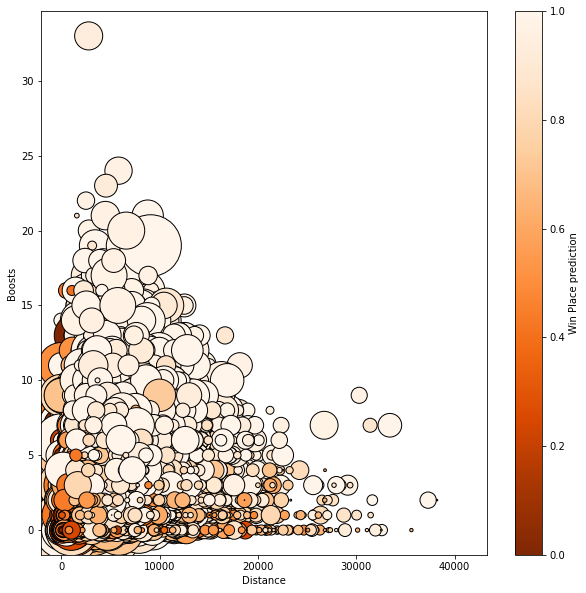

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['travel'],y=data["boosts"],cmap='Oranges_r',c=data["winPlacePerc"],edgecolors='black',s=data["damageDealt"])
cbar=plt.colorbar()
cbar.set_label("Win Place prediction")
plt.xlabel("Distance")
plt.ylabel("Boosts")

As we can see in the graph ,when they take boosts players will give more damange to the other players

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'headshot_rate',
       'health refill', 'travel', 'killss'],
      dtype='object')

# Scaling

Scaling the data is not required for the given dataset because we have only limited or very less variations in the feature columns.

## Model Creation

# Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
ss=StandardScaler()
le=LabelEncoder()
mm=MinMaxScaler()
svc=SVC()
lr=LogisticRegression()
lin=LinearRegression()

In [ ]:
data.groupId=le.fit_transform(data.groupId)
data.matchId=le.fit_transform(data.matchId)
data.Id=le.fit_transform(data.Id)
data.winPlacePerc=le.fit_transform(data.winPlacePerc)

In [ ]:
x= data.iloc[:,1:-6]
y=data.winPlacePerc

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   groupId          int64  
 1   matchId          int64  
 2   assists          int64  
 3   boosts           int64  
 4   damageDealt      float64
 5   DBNOs            int64  
 6   headshotKills    int64  
 7   heals            int64  
 8   killPlace        int64  
 9   killPoints       int64  
 10  kills            int64  
 11  killStreaks      int64  
 12  longestKill      float64
 13  matchDuration    int64  
 14  matchType        int64  
 15  maxPlace         int64  
 16  numGroups        int64  
 17  rankPoints       int64  
 18  revives          int64  
 19  rideDistance     float64
 20  roadKills        int64  
 21  swimDistance     float64
 22  teamKills        int64  
 23  vehicleDestroys  int64  
 24  walkDistance     float64
 25  weaponsAcquired  int64  
dtypes: float64(5), int64(21)
memory usage: 882

In [ ]:
x

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired
0,613775,30086,0,0,0.00,0,0,0,60,1241,...,26,-1,0,0.0000,0,0.000,0,0,244.80,1
1,827823,32752,0,0,91.47,0,0,0,57,0,...,25,1484,0,0.0045,0,11.040,0,0,1434.00,5
2,843521,3143,1,0,68.00,0,0,0,47,0,...,47,1491,0,0.0000,0,0.000,0,0,161.80,2
3,1340462,45261,0,0,32.90,0,0,0,75,0,...,30,1408,0,0.0000,0,0.000,0,0,202.70,3
4,1757849,20532,0,0,100.00,0,0,0,45,0,...,95,1560,0,0.0000,0,0.000,0,0,49.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,1664316,4448,0,0,0.00,0,0,0,74,1029,...,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3
4446962,512970,44628,0,1,44.15,0,0,0,69,0,...,93,1501,0,0.0000,0,0.000,0,0,81.70,6
4446963,1792643,20383,0,0,59.06,0,0,0,66,0,...,28,1500,0,0.0000,0,2.184,0,0,788.70,4
4446964,1537012,37720,0,4,180.40,1,1,2,11,0,...,25,1418,2,0.0000,0,0.000,0,0,2748.00,8


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111741 entries, 1799003 to 1692743
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   groupId          1111741 non-null  int64  
 1   matchId          1111741 non-null  int64  
 2   assists          1111741 non-null  int64  
 3   boosts           1111741 non-null  int64  
 4   damageDealt      1111741 non-null  float64
 5   DBNOs            1111741 non-null  int64  
 6   headshotKills    1111741 non-null  int64  
 7   heals            1111741 non-null  int64  
 8   killPlace        1111741 non-null  int64  
 9   killPoints       1111741 non-null  int64  
 10  kills            1111741 non-null  int64  
 11  killStreaks      1111741 non-null  int64  
 12  longestKill      1111741 non-null  float64
 13  matchDuration    1111741 non-null  int64  
 14  matchType        1111741 non-null  int64  
 15  maxPlace         1111741 non-null  int64  
 16  numGroups   

In [ ]:
x_train.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
dtype: int64

In [ ]:
lin.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=lin.predict(x_test)
y_predict

array([ 896.06698678, 2266.16568533, 2373.47412277, ..., 1393.69478886,
         50.96323586,  853.08366712])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score=r2_score(y_test,y_predict)
r2_score

0.8296603940095639

In [ ]:
x_test.shape

(3335225, 26)

In [ ]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.82)*(3335225-1)/(3335225-26-1)
adjusted_r2

0.8199985967849585

In [ ]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))
print(mean_absolute_error(y_test,y_predict))

144819.69156680358
380.5518250735418
278.9932343297926


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree

model = DecisionTreeRegressor(random_state=40)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_test,predictions)

In [ ]:
r2score

0.8492627021631753

In [ ]:
x_test.shape

(3335225, 26)

In [ ]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.84)*(3335225-1)/(3335225-26-1)
adjusted_r2

0.8399987526977408

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_predict=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score=r2_score(y_test,y_predict)
r2_score

0.8296603940095639

In [ ]:
adjusted_r2 = 1-(1-0.91)*(3335225-1)/(3335225-26-1)
adjusted_r2

0.9099992983924793

## Lasso Linear model

In [ ]:
from sklearn import linear_model
lasso=linear_model.Lasso(alpha=0.1)

In [ ]:
lasso.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.078e+10, tolerance: 9.459e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [ ]:
lasso_predict=lasso.predict(x_test)

In [ ]:
import math
print(mean_squared_error(y_test,lasso_predict))
print(math.sqrt(mean_squared_error(y_test,lasso_predict)))
print(mean_absolute_error(y_test,lasso_predict))

144825.7847329592
380.55983068757956
278.987824010902


# **Conclusion**

1. LINEAR REGRESSION

* r2score = 0.8305

* adjusted_r2 = 0.8299

2. DECISION TREE REGRESSOR

* r2score = 0.8459

* adjusted_r2 = 0.8399

3. RANDOM FOREST REGRESSOR

* r2score = 0.9167

* adjusted_r2 = 0.9099

### By comparing various regression machine learning models,we found that Linear Regression model is best suited for PUBG WinPlace Predication Dataset, based on the above listed r2score and adjusted_r2 score for respective machine learning models.